# **✨ DAEM Team Project**
## **┗ EDA about Casting dataset**
---

<img src="https://www.longshengmfg.com/wp-content/uploads/2024/05/1041-1.jpg" width="500" height="300">

> **About Data**

* dataset link : https://www.kamp-ai.kr/aidataDetail?AI_SEARCH=%EC%A3%BC%EC%A1%B0&page=1&DATASET_SEQ=53&EQUIP_SEL=&GUBUN_SEL=&FILE_TYPE_SEL=&WDATE_SEL=
* Dataset Description
    * **Casting** is a manufacturing process where metals (such as iron, aluminum alloys, copper, etc.) are melted and poured into molds to solidify, making it suitable for creating detailed and complex shapes and ideal for mass production.
    * Types of casting include die casting (metal molds), sand casting (sand molds), and shell casting (cell molds).
    * **Die casting** is a process where molten metal is forcibly injected into a metal mold (die), primarily using aluminum alloys, copper alloys, and magnesium alloys. The advantages of die casting include high precision, low cost, and fast production speed.
    * Key factors in die casting include the management of `pressure`, `speed`, `time`, and `temperature.`

* 📍The primary analysis goal is to classify pass or fail outcomes by analyzing various key factors.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('경진대회용 주조 공정최적화 데이터셋.csv', encoding='cp949', index_col=0)
df

,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:51:29,71,가동,ON,731.0,122,...,1449.0,279.0,726.0,30.0,0,2019-03-31 23:51:29,0.0,NaN,8917,A
92011,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:53:28,72,가동,ON,731.0,120,...,1449.0,279.0,732.0,30.0,0,2019-03-31 23:53:28,0.0,NaN,8917,A
92012,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:55:44,73,가동,ON,732.0,122,...,1449.0,272.0,731.0,30.0,0,2019-03-31 23:55:44,0.0,NaN,8917,A
92013,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:57:46,74,가동,ON,732.0,133,...,1449.0,288.0,723.0,30.0,0,2019-03-31 23:57:46,0.0,NaN,8917,A


In [3]:
df.columns

Index(['line', 'name', 'mold_name', 'time', 'date', 'count', 'working',
       'emergency_stop', 'molten_temp', 'facility_operation_cycleTime',
       'production_cycletime', 'low_section_speed', 'high_section_speed',
       'molten_volume', 'cast_pressure', 'biscuit_thickness',
       'upper_mold_temp1', 'upper_mold_temp2', 'upper_mold_temp3',
       'lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3',
       'sleeve_temperature', 'physical_strength', 'Coolant_temperature',
       'EMS_operation_time', 'registration_time', 'passorfail',
       'tryshot_signal', 'mold_code', 'heating_furnace'],
      dtype='object')

> **Variable Description**

|Column|Description|
|:---|:---|
|line|Name of the production line where the product is manufactured|
|name|The name of the product|
|mold_name|The name of the mold used to produce the product|
|time|The date when the data was collected (hours, minutes, seconds)|
|date|The time when the data was collected|
|count|The unique number of the product produced on that specific date,representing the production sequence for each day|
|working|Indicates whether the facility is operational ('Operating' or 'Stopped')|
|emergency_stop|Indicates whether the facility is in an emergency stop state ('ON' or 'OFF')|
|molten_temp|The temperature of the molten metal (molten temperature)|
|facility_operation_CycleTime|The operation cycle time of the facility, indicating how long one cycle of operation took|
|production_CycleTime|The cycle time required to produce one product|
|low_section_speed|The speed during the low-speed section, which refers to the speed at which metal is injected during the low-speed phase of die casting|
|high_section_speed|The speed during the high-speed section, referring to the speed of metal injection during the high-speed phase of die casting|
| molten_volume|The volume of molten metal used for casting|
|cast_pressure|The pressure applied when injecting metal into the mold during casting.
|biscuit_thickness|The thickness of the biscuit, the leftover portion between the product and the mold after casting.
|upper_mold_temp1|The temperature at the first point of the upper mold.
|upper_mold_temp2|The temperature at the second point of the upper mold.
|upper_mold_temp3|The temperature at the third point of the upper mold.
|lower_mold_temp1|The temperature at the first point of the lower mold.
|lower_mold_temp2|The temperature at the second point of the lower mold.
|lower_mold_temp3|The temperature at the third point of the lower mold.
|sleeve_temperature|The temperature of the sleeve (a specific part of the mold).
|physical_strength|The physical strength of the product (or measured force).
|Coolant_temperature|The temperature of the coolant used to rapidly cool the metal after casting.
|EMS_operation_time|The operation time of the electromagnetic stirring equipment.
|registration_time|The time when the data was recorded.
|passorfail|Indicates whether the product passed or failed quality checks (0: Pass, 1: Fail).
|tryshot_signal|The tryshot signal, a signal used under certain conditions during casting.
|mold_code|The code number of the mold used.
|heating_furnace|The name or code of the heating furnace used during production.

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92015 entries, 0 to 92014
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   line                          92015 non-null  object 
 1   name                          92015 non-null  object 
 2   mold_name                     92015 non-null  object 
 3   time                          92015 non-null  object 
 4   date                          92015 non-null  object 
 5   count                         92015 non-null  int64  
 6   working                       92014 non-null  object 
 7   emergency_stop                92014 non-null  object 
 8   molten_temp                   89754 non-null  float64
 9   facility_operation_cycleTime  92015 non-null  int64  
 10  production_cycletime          92015 non-null  int64  
 11  low_section_speed             92014 non-null  float64
 12  high_section_speed            92014 non-null  float64
 13  molten

## 1️⃣ summary statistics

### Missing values

In [4]:
df.isnull().sum().div(len(df))

,0
line,0.000000
name,0.000000
mold_name,0.000000
time,0.000000
date,0.000000
count,0.000000
working,0.000011
emergency_stop,0.000011
molten_temp,0.024572
facility_operation_cycleTime,0.000000


▶️ Variables with more than 30% missing data (`molten_volume`, `tryshot_signal`, `heating_furnace`) are excluded from the analysis.

▶️ Afterward, rows containing missing data will be removed.


In [5]:
df = df.drop(columns=['molten_volume', 'tryshot_signal','heating_furnace'])
df = df.dropna() # null 값 포함 행 제거

In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

,0
line,0
name,0
mold_name,0
time,0
date,0
count,0
working,0
emergency_stop,0
molten_temp,0
facility_operation_cycleTime,0


In [7]:
# Remaining columns
df.columns

Index(['line', 'name', 'mold_name', 'time', 'date', 'count', 'working',
       'emergency_stop', 'molten_temp', 'facility_operation_cycleTime',
       'production_cycletime', 'low_section_speed', 'high_section_speed',
       'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1',
       'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1',
       'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature',
       'physical_strength', 'Coolant_temperature', 'EMS_operation_time',
       'registration_time', 'passorfail', 'mold_code'],
      dtype='object')

In [8]:
# Make Week columns for EDA later
df['datetime'] = pd.to_datetime(df['time'] + ' ' + df['date'])

# week 별 divide
start_date = pd.to_datetime('2019-01-02 16:45')
interval_date = pd.to_datetime('2019-01-09 20:00:00')
end_date = pd.to_datetime('2019-03-31 23:59:59')
regular_intervals = pd.date_range(start=interval_date, end='2019-03-24 20:00:00', freq='W')

date_range = [start_date] + list(regular_intervals) + [end_date]
df['week'] = pd.cut(df['datetime'], bins=date_range, labels=[str(i) for i in range(1,len(date_range))])
df.head(3)

,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,mold_code,datetime,week
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,8722,2019-01-02 16:45:06,1
22,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,17:27:28,73,가동,ON,731.0,119,...,1449.0,479.0,708.0,35.0,23,2019-01-02 17:27:28,1.0,8722,2019-01-02 17:27:28,1
24,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,17:29:32,1,가동,ON,731.0,119,...,1449.0,513.0,700.0,35.0,23,2019-01-02 17:29:32,1.0,8722,2019-01-02 17:29:32,1


---

### Describe
- Describe for numeric variables

In [9]:
# Extract relevant columns for summary statistics
columns_of_interest = ['facility_operation_cycleTime', 'production_cycletime', 'low_section_speed',
                       'high_section_speed','cast_pressure', 'biscuit_thickness', 'upper_mold_temp1',
                       'upper_mold_temp2', 'upper_mold_temp3','lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3','sleeve_temperature',
                       'physical_strength', 'Coolant_temperature', 'EMS_operation_time','passorfail', 'mold_code']
df['mold_code'] = df['mold_code'].astype('object')

# Extract the main features and target variable
df_main_features = df[columns_of_interest]

# Generate summary statistics for these features
summary_stats = df_main_features.describe()

summary_stats

,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail
count,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000
mean,121.702239,122.318925,110.067922,111.837960,324.527219,50.717881,186.058821,166.520488,1316.772073,204.734484,200.693474,1441.774891,416.044622,703.127101,32.303049,18.279000,0.044186
std,12.169837,12.549906,309.504180,9.646943,27.308033,18.043014,46.343803,31.774197,396.757216,53.716432,44.884524,221.929145,116.456759,308.047352,14.452419,8.433715,0.205508
min,69.000000,0.000000,0.000000,0.000000,41.000000,0.000000,18.000000,15.000000,42.000000,18.000000,20.000000,299.000000,23.000000,0.000000,16.000000,0.000000,0.000000
25%,117.000000,119.000000,110.000000,112.000000,329.000000,47.000000,162.000000,149.000000,1449.000000,166.000000,174.000000,1449.000000,380.000000,697.000000,31.000000,23.000000,0.000000
50%,119.000000,121.000000,110.000000,112.000000,330.000000,50.000000,195.000000,173.000000,1449.000000,210.000000,199.000000,1449.000000,457.000000,703.000000,32.000000,23.000000,0.000000
75%,122.000000,123.000000,110.000000,112.000000,331.000000,53.000000,222.000000,185.000000,1449.000000,251.000000,229.000000,1449.000000,483.000000,710.000000,34.000000,23.000000,0.000000
max,457.000000,482.000000,65535.000000,388.000000,348.000000,422.000000,1449.000000,4232.000000,1449.000000,369.000000,1449.000000,65503.000000,1449.000000,65535.000000,1449.000000,23.000000,1.000000


In [10]:
df_main_features

,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,119,120,110.0,112.0,331.0,35.0,198.0,116.0,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
22,119,120,109.0,125.0,177.0,48.0,24.0,33.0,1449.0,30.0,273.0,1449.0,479.0,708.0,35.0,23,1.0,8722
24,119,123,109.0,112.0,176.0,49.0,26.0,55.0,1449.0,30.0,323.0,1449.0,513.0,700.0,35.0,23,1.0,8722
26,119,124,109.0,112.0,331.0,47.0,31.0,65.0,1449.0,30.0,343.0,1449.0,531.0,708.0,34.0,23,1.0,8722
28,120,124,110.0,112.0,331.0,46.0,36.0,73.0,1449.0,31.0,343.0,1449.0,544.0,707.0,34.0,23,1.0,8722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


### Outliers


- Looking at the describe section, it appears that there may be some outliers.
- **Outliers** can distort analysis results
- Therefore, it’s necessary to remove outliers from our data.
- (As an example, the boxplot below represents the distribution for variables related to `upper_mold_temp`.)



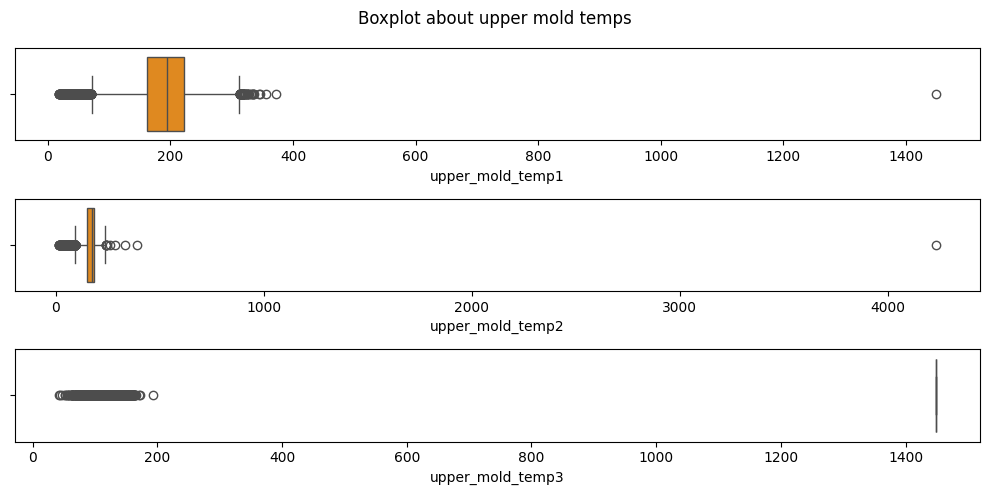

In [11]:
fig, axes = plt.subplots(3,1, figsize=(10,5))
fig.suptitle('Boxplot about upper mold temps')
sns.boxplot(data=df_main_features, x='upper_mold_temp1', ax=axes[0], color='darkorange')
sns.boxplot(data=df_main_features, x='upper_mold_temp2', ax=axes[1], color='darkorange')
sns.boxplot(data=df_main_features, x='upper_mold_temp3', ax=axes[2], color='darkorange')

plt.tight_layout()

```
* Method 1: IQR (Interquartile Range) method
            Remove outliers based on data spread between the first and third quartiles.
* Method 2: Using the 99.9th and 0.1th percentiles
            Remove extreme values by focusing on the central 99.8% of the data.
```

In [12]:
# IQR method
# Detect outliers using the IQR method (for numeric columns)
Q1 = df_main_features.quantile(0.25)
Q3 = df_main_features.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values that fall outside 1.5 * IQR above Q3 or below Q1
outliers = ((df_main_features < (Q1 - 1.5 * IQR)) | (df_main_features > (Q3 + 1.5 * IQR))).sum()

outliers

,0
facility_operation_cycleTime,6383
production_cycletime,6316
low_section_speed,22059
high_section_speed,31925
cast_pressure,20063
biscuit_thickness,904
upper_mold_temp1,670
upper_mold_temp2,1046
upper_mold_temp3,8943
lower_mold_temp1,50


▶️ Too many rows are removed by IQR method

In [13]:
# 99.9 / 0.1 percentile method
# Create a copy of the dataframe to preserve the original data
df_filtered = df_main_features.copy()

# Initialize dictionaries to store UCL and LCL for each column
UCL_dict = {}
LCL_dict = {}

# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}

# Calculate the UCL and LCL for all columns (excluding 'passorfail')
for col in df_filtered.columns.drop('passorfail'):
    UCL_dict[col] = np.percentile(df_filtered[col], 99.9)  # Upper Control Limit (99.9th percentile)
    LCL_dict[col] = np.percentile(df_filtered[col], 0.1)   # Lower Control Limit (0.1th percentile)

    # Count how many rows are above UCL or below LCL for the current column
    num_outliers_above = (df_filtered[col] > UCL_dict[col]).sum()
    num_outliers_below = (df_filtered[col] < LCL_dict[col]).sum()

    # Store the total number of outliers for this column
    outliers_count[col] = num_outliers_above + num_outliers_below

    # Print the number of outliers for the current column
    print(f'{col}: {num_outliers_above} above UCL, {num_outliers_below} below LCL')

# Store the initial number of rows
initial_row_count = df_filtered.shape[0]

# Filter rows based on UCL and LCL for all columns in one go
for col in df_filtered.columns.drop('passorfail'):
    df_filtered = df_filtered[(df_filtered[col] <= UCL_dict[col]) & (df_filtered[col] >= LCL_dict[col])]

# Calculate the total number of rows removed
total_rows_removed = initial_row_count - df_filtered.shape[0]

# Print how many rows were removed in total
print(f'Total rows removed after filtering: {total_rows_removed}')

facility_operation_cycleTime: 88 above UCL, 88 below LCL
production_cycletime: 88 above UCL, 75 below LCL
low_section_speed: 12 above UCL, 0 below LCL
high_section_speed: 89 above UCL, 80 below LCL
cast_pressure: 90 above UCL, 86 below LCL
biscuit_thickness: 71 above UCL, 89 below LCL
upper_mold_temp1: 80 above UCL, 81 below LCL
upper_mold_temp2: 68 above UCL, 90 below LCL
upper_mold_temp3: 0 above UCL, 83 below LCL
lower_mold_temp1: 89 above UCL, 90 below LCL
lower_mold_temp2: 75 above UCL, 88 below LCL
lower_mold_temp3: 1 above UCL, 89 below LCL
sleeve_temperature: 74 above UCL, 87 below LCL
physical_strength: 82 above UCL, 75 below LCL
Coolant_temperature: 77 above UCL, 56 below LCL
EMS_operation_time: 0 above UCL, 0 below LCL
mold_code: 0 above UCL, 0 below LCL
Total rows removed after filtering: 1790


▶️ By using the 99.9th and 0.1th percentiles method, we are able to remove outliers  effectively and retain more data.

---

## 2️⃣ Data Visualization

### 1. Pass / Fail rate

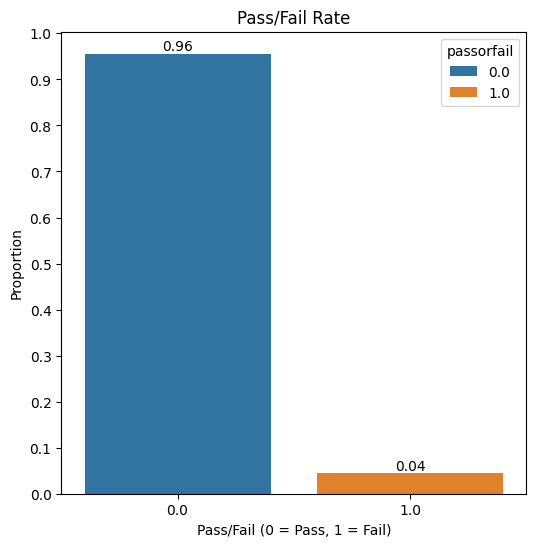

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First, calculate the proportion of failures in the 'passorfail' column
failure_rate = df_main_features['passorfail'].value_counts(normalize=True)

# Plot the failure rates with count labels on top of the bars
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=failure_rate.index, y=failure_rate.values, hue=failure_rate.index)

# Add count labels on top of the bars, excluding very small values
for p in ax.patches:
    if p.get_height() > 0.01:  # Only add labels for values above 0.01
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

plt.title('Pass/Fail Rate')
plt.xlabel('Pass/Fail (0 = Pass, 1 = Fail)')
plt.ylabel('Proportion')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

▶️ The defect rate is approximately **4%.**

▶️ There is an imbalance in the ratio between good products and defective ones.

### 2. Variables Distribution based on pass/fail

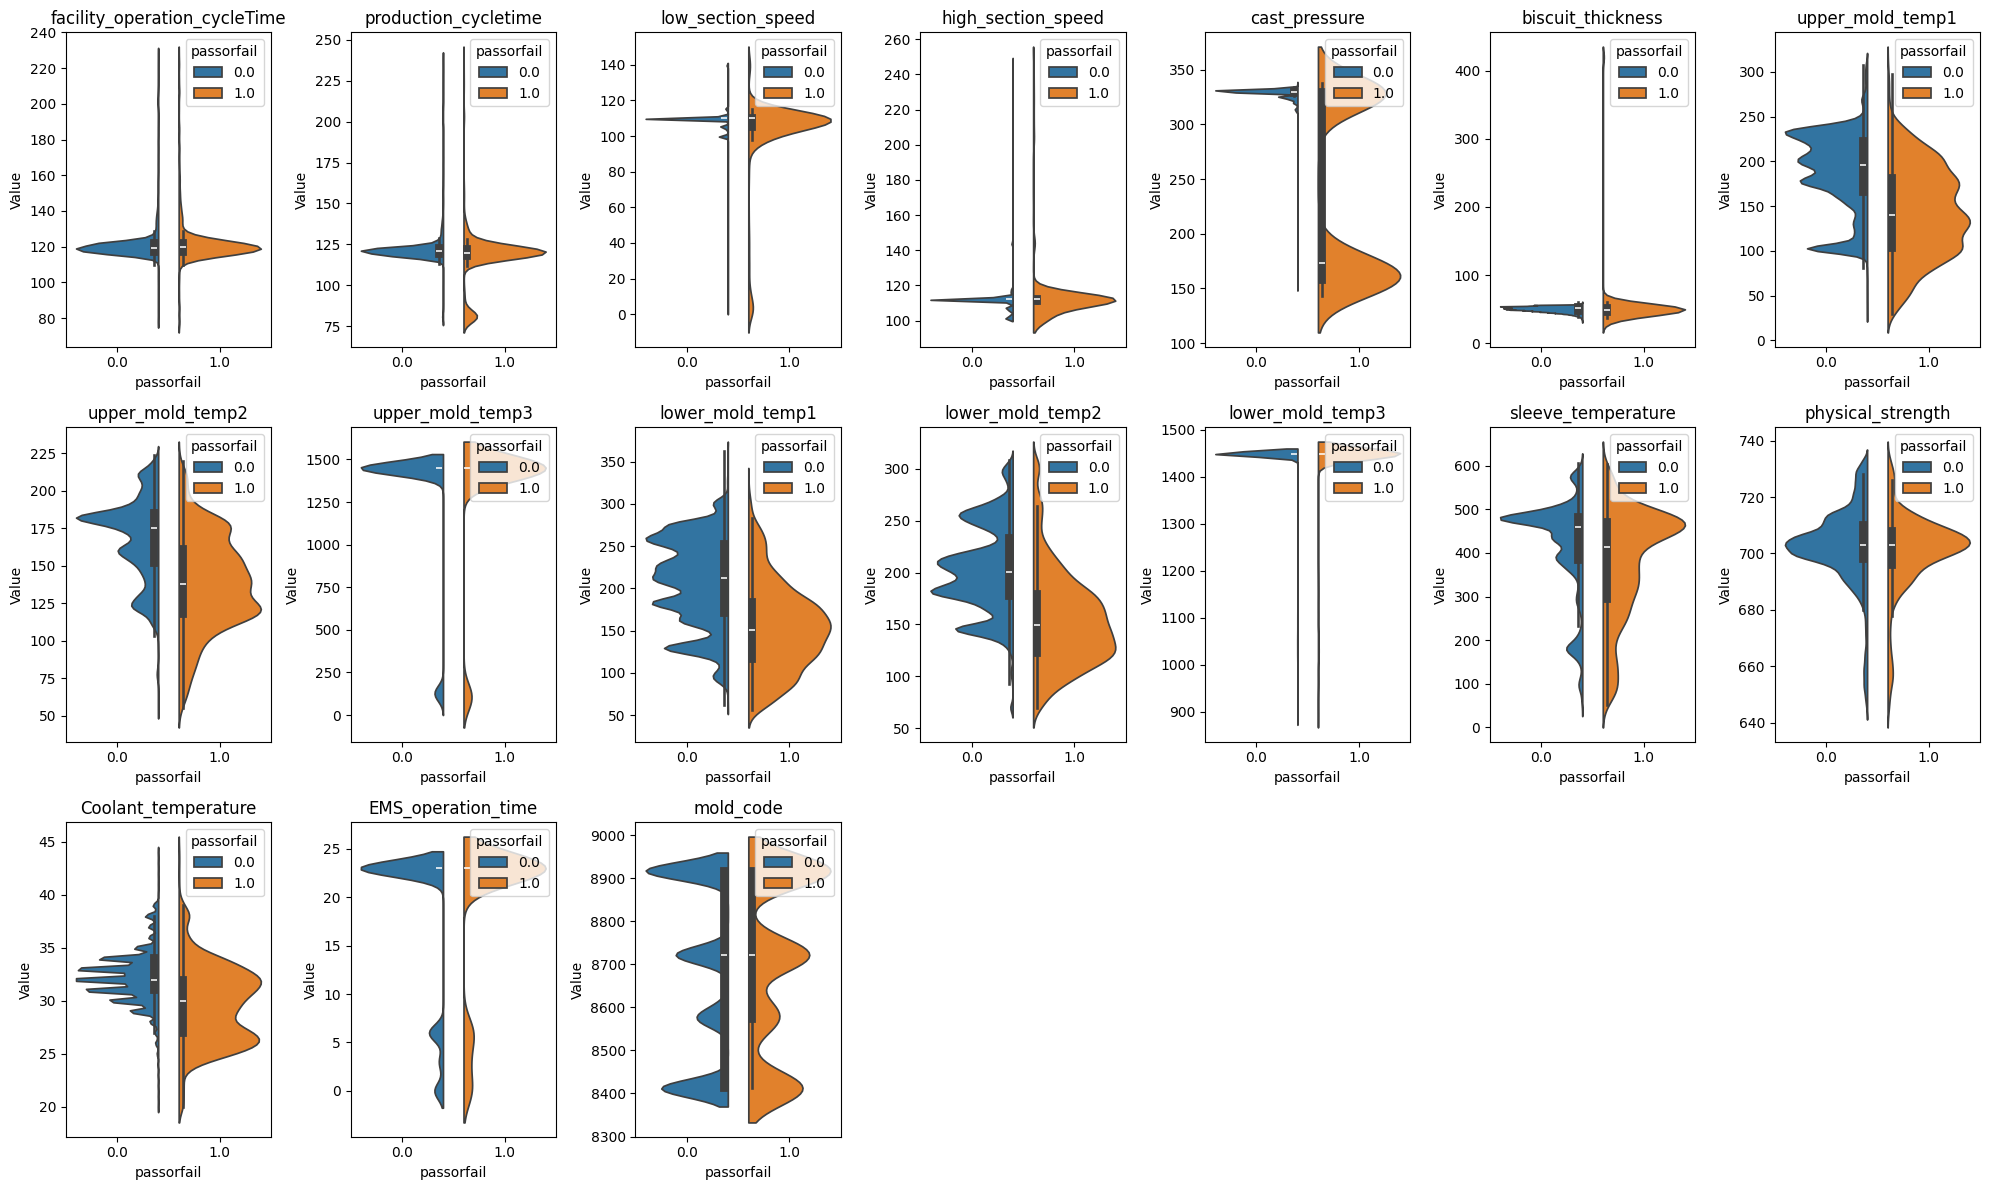

In [15]:
# Recreate the df_filtered dataset
# (The previous context has been lost, so let's assume it's the same df_main_features from earlier)

# Use the same filtering process to create df_filtered
import numpy as np

df_filtered = df_main_features.copy()

# Initialize dictionaries to store UCL and LCL for each column
UCL_dict = {}
LCL_dict = {}

# Calculate the UCL and LCL for all columns (excluding 'passorfail')
for col in df_filtered.columns.drop('passorfail'):
    UCL_dict[col] = np.percentile(df_filtered[col], 99.9)  # Upper Control Limit (99.9th percentile)
    LCL_dict[col] = np.percentile(df_filtered[col], 0.1)   # Lower Control Limit (0.1th percentile)

    # Filter the dataframe based on the calculated percentiles
    df_filtered = df_filtered[(df_filtered[col] <= UCL_dict[col]) & (df_filtered[col] >= LCL_dict[col])]

# Now apply the violin plot as requested
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe to bring it into a long format suitable for violin plot
df_melted = df_filtered.melt(id_vars='passorfail', var_name='Feature', value_name='Value')

# Get a list of unique features to loop over
features = df_melted['Feature'].unique()

# Set up the number of rows and columns for subplots (adjust based on the number of features)
num_cols = 7  # Number of columns in the grid
num_rows = (len(features) // num_cols) + 1  # Calculate the number of rows

# Set up the figure for subplots
plt.figure(figsize=(20, num_rows * 4))

# Loop through each feature and create a violin plot for it
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(x='passorfail', y='Value', hue='passorfail', data=df_melted[df_melted['Feature'] == feature], split=True)
    plt.title(f'{feature}')
    plt.tight_layout()

plt.show()

▶️ It is possible to observe the difference in data distribution between pass and fail for the variables `cast_pressure`, `upper_mold_temp1`, `upper_mold_temp2`, `lower_mold_temp1`, `lower_mold_temp2`, and `coolant_temperature` through violin plot.

### 3. Cast Pressure based on pass/fail

In [16]:
df_pressure = df_filtered.copy()
df_pressure['cast_pressure_bins'] = pd.cut(df_pressure['cast_pressure'], bins=10)
pivot_pressure = df_pressure.pivot_table(index='cast_pressure_bins', values='passorfail', aggfunc='mean')
pivot_pressure

,passorfail
cast_pressure_bins,
"(142.805, 162.5]",0.994903
"(162.5, 182.0]",0.992978
"(182.0, 201.5]",1.000000
"(240.5, 260.0]",1.000000
"(260.0, 279.5]",1.000000
"(279.5, 299.0]",0.500000
"(299.0, 318.5]",0.030625
"(318.5, 338.0]",0.014367


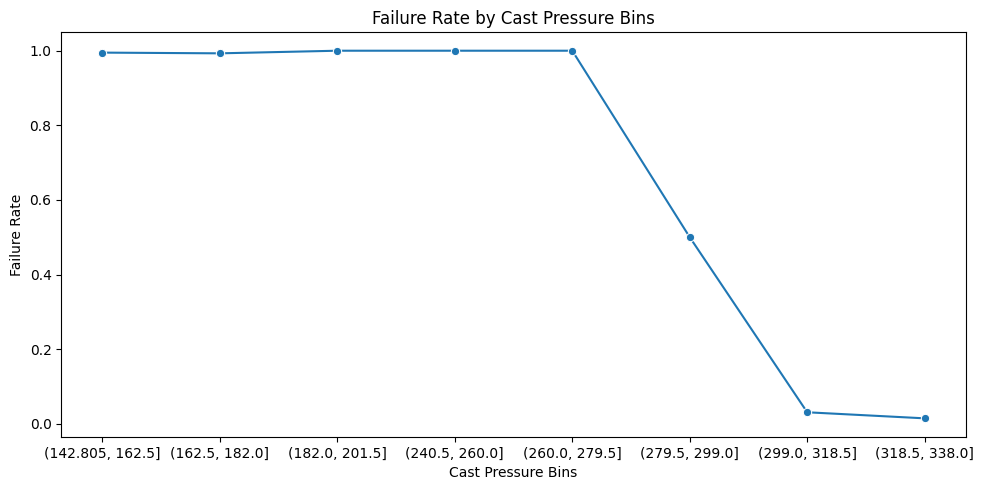

In [17]:
# Create a line plot for the pivot table showing cast pressure bins vs pass/fail rate
plt.figure(figsize=(10,5))
sns.lineplot(data=pivot_pressure, x=pivot_pressure.index.astype(str), y='passorfail', marker='o')

# Set labels and title
plt.xlabel('Cast Pressure Bins')
plt.ylabel('Failure Rate')
plt.title('Failure Rate by Cast Pressure Bins')

# Show the plot
plt.tight_layout()
plt.show()

▶️ Lower cast pressure tends to increase the fail rate.

### 4. Cast pressure based on types of molds

Average  Maximum  Minimum    25%  Quantile     75%
mold_code passorfail                                                       
8412      pass        327.132141    338.0    169.0  321.0     331.0  333.00
          fail        206.546875    338.0    143.0  155.0     165.0  321.25
8413      pass        329.922519    332.0    321.0  330.0     330.0  330.00
          fail        270.122449    331.0    151.0  170.0     330.0  330.00
8573      pass        330.412108    338.0    158.0  330.0     331.0  331.00
          fail        168.848276    331.0    144.0  157.0     158.0  166.75
8576      pass        331.829105    338.0    303.0  332.0     332.0  332.00
          fail        209.354839    332.0    145.0  154.5     156.0  331.00
8600      pass        324.853103    329.0    324.0  325.0     325.0  325.00
          fail        267.860000    326.0    144.0  153.0     324.0  325.00
8722      pass        328.259001    335.0    149.0  325.0     330.0  331.00
          fail        270.320755    333.0    143.0  173.0     325.0  330.00
8917      pass        330.201893    338.0    175.0  329.0     330.0  331.00
          fail        224.641193    335.0    143.0  157.0     171.0  330.00

Text(0.5, 1.0, 'Average Cast Pressure by Mold')

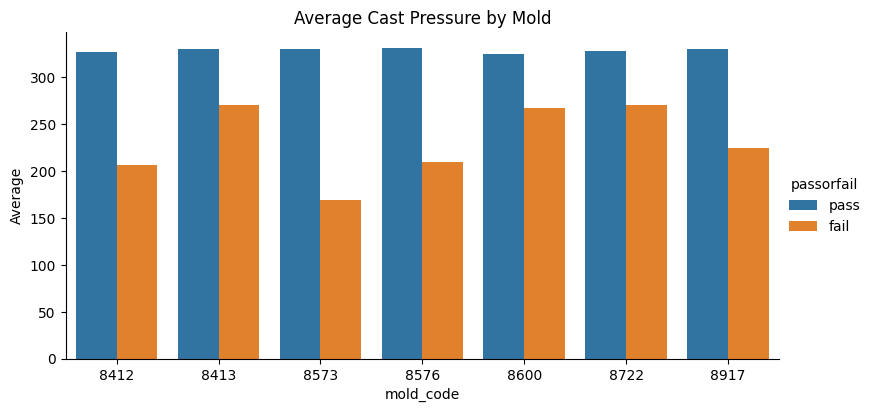

In [18]:
#Getting the cast pressure informations by each mold
df_cast_pressure_by_mold_pivot = df_filtered.pivot_table(index=['mold_code','passorfail'],values='cast_pressure',
                                                         aggfunc={'mean','max','min','quantile',
                                                                  lambda x: np.percentile(x, 25),
                                                                  lambda x: np.percentile(x, 75)})

#Renaming the columns to understand more easily
df_cast_pressure_by_mold_pivot = df_cast_pressure_by_mold_pivot.rename(
    columns={'mean': 'Average',
             '<lambda_0>':'25%',
             '<lambda_1>':'75%',
             'max':'Maximum',
             'min':'Minimum',
             'quantile':'Quantile'}, level=0
)


#Ordering the columns to see it more clearly
new_order = ['Average','Maximum', 'Minimum','25%','Quantile','75%']
df_cast_pressure_by_mold_pivot = df_cast_pressure_by_mold_pivot[new_order]

# Rename rows using a dictionary mapping
df_cast_pressure_by_mold_pivot = df_cast_pressure_by_mold_pivot.rename(
    index={
        0.0: 'pass',  # Rename 0.0 to 'pass'
        1.0: 'fail'  # Rename 1.0 to 'fail'
    },
    level=1  # To rename rows in the second level (innermost)
)

display(df_cast_pressure_by_mold_pivot)

#To see the average cast pressure for each mold in both case
sns.catplot(data=df_cast_pressure_by_mold_pivot, x='mold_code', hue='passorfail',y='Average', kind='bar', height=4, aspect=2)
plt.title('Average Cast Pressure by Mold')

▶️ As look at the relationship between `cast_pressure` and `mold_code`, there is a slight differences for each mold.

▶️ The average pressure for pass outcomes was similar across molds, but for fail outcomes, the average pressure varied by mold.

Conduct additional analysis to investigate whether different molds were used each week.

### 5. Weekly Usage Count of Molds

week,1,2,3,4,5,6,7,8,9,10,11,12
mold_code,,,,,,,,,,,,
8412,706,2621,822,0,0,555,3959,3308,3079,3848,0,0
8413,0,0,0,0,0,0,0,0,0,1236,3924,874
8573,5605,3263,728,0,0,0,0,0,0,0,0,0
8576,0,0,0,0,0,0,0,0,0,0,793,0
8600,0,0,1104,1856,0,0,0,0,0,0,0,0
8722,38,0,1793,4214,1832,3738,2955,2125,2092,1261,0,0
8917,0,0,3134,4011,1620,2312,3442,3543,3979,2729,3106,3236


Text(0.5, 1.0, 'Weekly Usage Count of Molds')

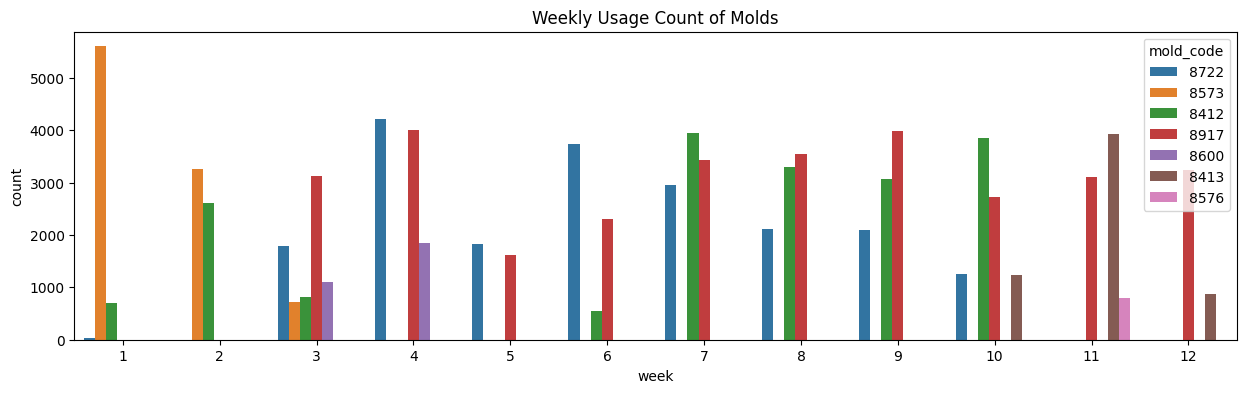

In [19]:
# join with week by index
df_week = df_main_features.copy()
df_week = df_week.join(df[['week']], how='left')

# pivot
pivot_week = df_week.pivot_table(index='mold_code', columns='week', aggfunc='size')
display(pivot_week)

# countplot
df_week = df_week.astype('str')
plt.figure(figsize=(15,4))
sns.countplot(df_week, x='week', hue='mold_code')
plt.title('Weekly Usage Count of Molds')

▶️ It is observed that different types of molds are used each week.

▶️ Some molds are used for only a short period, while others are not used for a time and then reused later.

### 6. Correlation

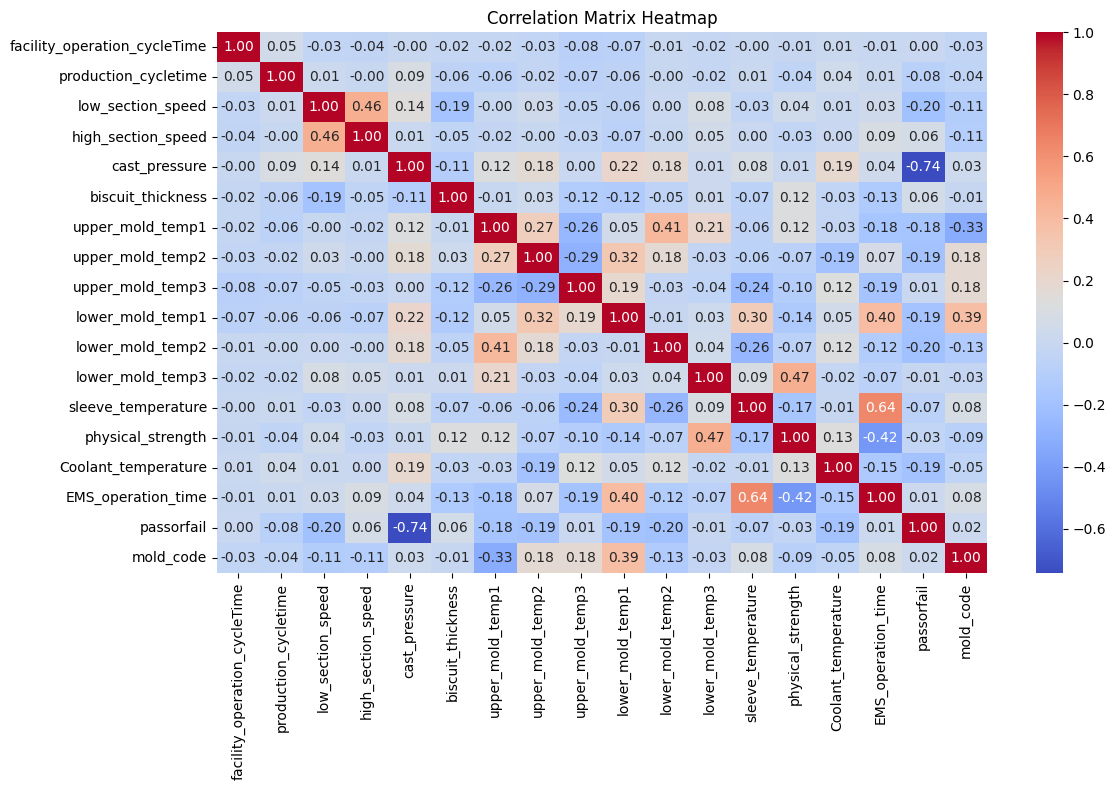

In [20]:
# Compute the correlation matrix for df_filtered
correlation_matrix = df_filtered.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

▶️ Variables with a high correlation: `(sleeve_temperature - EMS_operation_time)`, `(cast_pressure - passorfail)`

▶️ Variables with a moderate correlation: `(low_section_speed - high_section_speed)`, `(upper_mold_temp1 - lower_mold_temp2)`, `(EMS_operation_time - physical_strength)`, etc.

To further investigate (sleeve_temperature - EMS_operation_time) relationship, draw a scatter plot.


### 7. Scatter Plot of temperature and operation time

<Axes: xlabel='EMS_operation_time', ylabel='sleeve_temperature'>

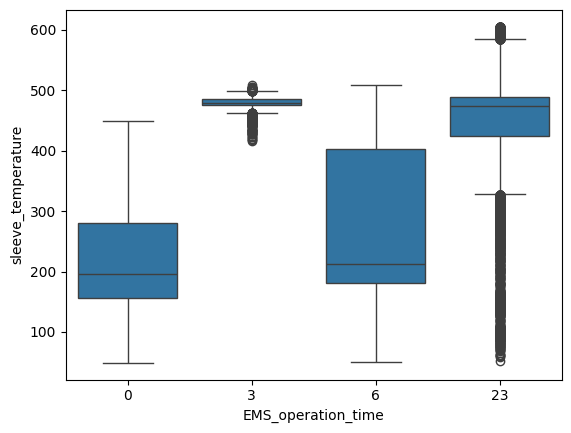

In [24]:
sns.boxplot(data=df_filtered, x='EMS_operation_time', x='sleeve_temperature')

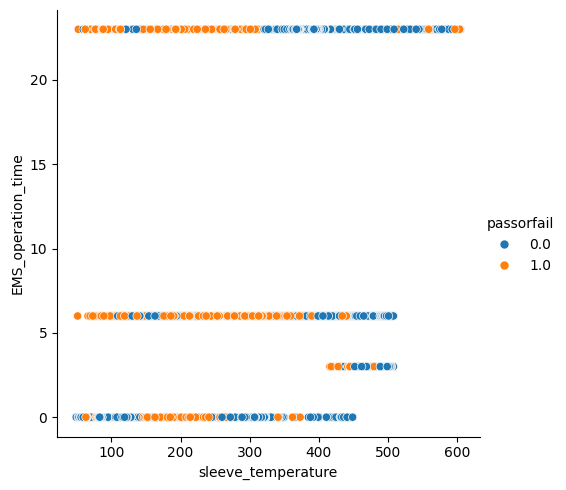

In [21]:
sns.relplot(data=df_filtered, x='sleeve_temperature', y='EMS_operation_time',
            hue = 'passorfail')

▶️ The correlation between `sleeve_temperature` and `EMS_operation_time`, which was previously found to be high (0.64), was examined using a scatter plot

▶️ Despite the correlation coefficient of 0.64, However,no significant relationship was observed.

---